# Derive the Table of Critical Values

In [1]:
# Import everything that's needed to run the notebook
import os
import pickle
import dill
import pathlib
import datetime
import random
import time

from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import util
from ipynb.fs.defs.descriptor_based_neural_networks import DescriptorBuilder, dbnn_output, prepare_input
from sklearn.model_selection import learning_curve

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [2]:
with open('dbnns1.p', 'rb') as f:
    dbnns = dill.load(f)
    
dbnn = dbnns['DBNN']

In [20]:
data = {}

for n in range(1, 101, 1):
    print(n)
    data[n] = [np.random.normal(0, 1, n).tolist() for i in range(10000)]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [21]:
alphas = [a / 100.0 for a in range(1, 100, 1)]

In [22]:
# Create a dictionary to store the critical values indexed by sample size and alpha
critical_values = {'n' : [], 'alpha' : [], 'T_c' : []}

# Find the critical values
for n in data:
    print(n)
    samples = data[n]
    outputs = dbnn_output(samples, dbnn)
    outputs = [output for sublist in outputs.tolist() for output in sublist]
    thresholds = np.quantile(outputs, alphas).tolist()
    for (alpha, value) in zip(alphas, thresholds):
        critical_values['n'].append(n)
        critical_values['alpha'].append(alpha)
        critical_values['T_c'].append(value)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [23]:
df = pd.DataFrame(critical_values)
df

,n,alpha,T_c
0,1,0.01,0.005303
1,1,0.02,0.005305
2,1,0.03,0.005307
3,1,0.04,0.005308
4,1,0.05,0.005309
...,...,...,...
9895,100,0.95,0.866820
9896,100,0.96,0.873267
9897,100,0.97,0.879512
9898,100,0.98,0.889081


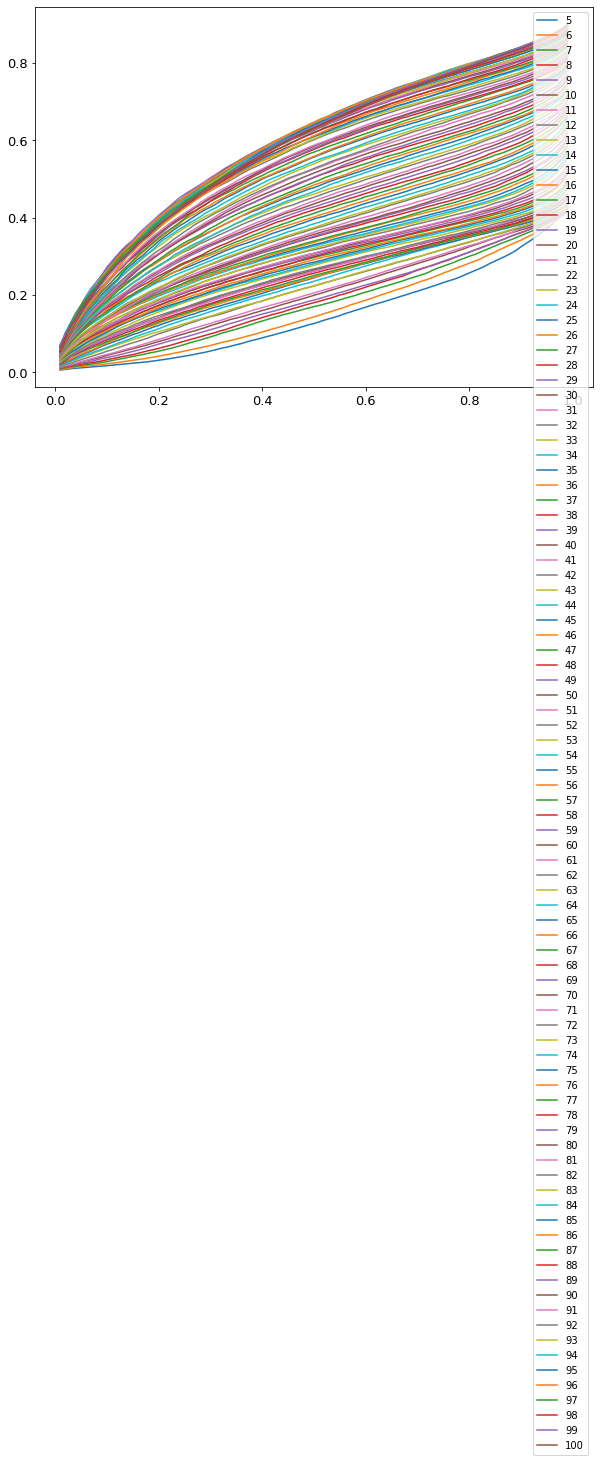

In [26]:
fig = plt.figure(figsize=(10, 7))

for n in df['n'].unique():
    if n >=5:
        y = df.loc[df['n'] == n, 'T_c']
        x = df.loc[df['n'] == n, 'alpha']
        plt.plot(x, y, label='{}'.format(n))
    
plt.legend()

In [29]:
df.to_csv('tc.csv', header=True, index=False)